In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read CSV
got_data = pd.read_csv("Resources/got.csv")
got_data

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [4]:
# Get attacker and defender data
attacker_data = got_data["attacker_king"].value_counts()
defender_data = got_data["defender_king"].value_counts()

In [5]:
defender_data

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Mance Rayder                 1
Renly Baratheon              1
Name: defender_king, dtype: int64

In [6]:
attacker_data

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [7]:
# Get total battle data
battle_data = attacker_data.add(defender_data, fill_value=0)

# Get total battle data another way, without using the .add() function which gave us some trouble in class...
battle_data_other_version = pd.DataFrame({"attacker": attacker_data, "defender": defender_data})
# Because we didn't use add()'s fill_value=0 argument, we need to replace NaNs with 0s.
battle_data_other_version.fillna(value=0, inplace=True)
# Add attacker and defender to return total values.
battle_data_other_version['tot_battles'] = battle_data_other_version['attacker'] + battle_data_other_version['defender']
# Sort the data to find winningest king.
battle_data_other_version = battle_data_other_version.sort_values('tot_battles', ascending=False).head(10)

In [8]:
battle_data

Balon/Euron Greyjoy         11.0
Joffrey/Tommen Baratheon    27.0
Mance Rayder                 1.0
Renly Baratheon              1.0
Robb Stark                  24.0
Stannis Baratheon            7.0
dtype: float64

<IPython.core.display.Javascript object>


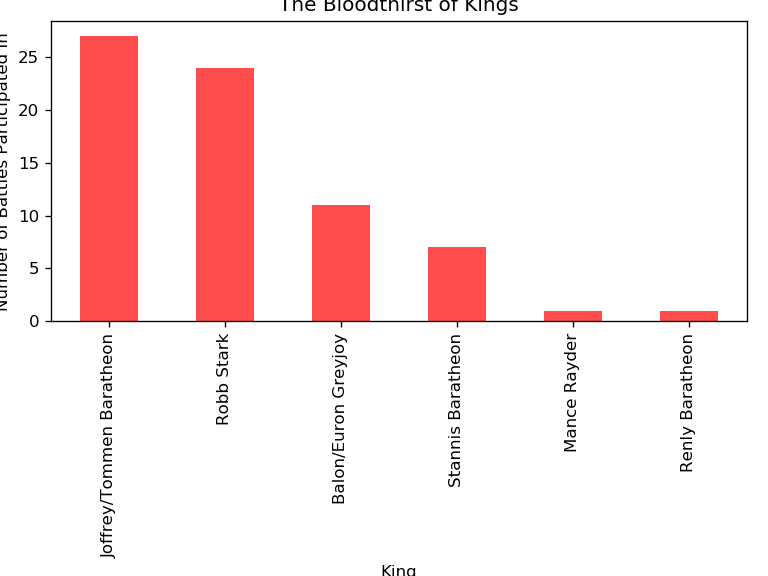

In [9]:
# Configure plot and ticks
# battle_data.plot(kind="bar", facecolor="red")
battle_data_other_version['tot_battles'].plot(kind='bar', facecolor='red', alpha=0.7)

In [12]:
# Set textual properties
plt.title("The Bloodthirst of Kings")
plt.ylabel("Number of Battles Participated In")
plt.xlabel("King")

Text(0.5, 11.333333783679539, 'King')

In [10]:
# Show plot
plt.show()

In [11]:
# Resize plot to display labels
plt.tight_layout()